In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/cross-site-scripting-xss-dataset-for-deep-learning/XSS_dataset.csv")

In [3]:
df = df.dropna()

In [4]:
X = df['Sentence']
y = df['Label']

In [5]:
vectorizer = CountVectorizer() # you can also try TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [6]:
lbl = LabelEncoder()
y = lbl.fit_transform(y)

In [7]:
def get_models():
    models = dict()
    models['lr'] = make_pipeline(LogisticRegression())
    models['knn'] = make_pipeline(KNeighborsClassifier())
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = make_pipeline(SVC())
#     models['bayes'] = make_pipeline(GaussianNB())
    return models

In [8]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [9]:
models = get_models()
results, names = list(), list()

In [10]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.997 (0.001)
>knn 0.994 (0.002)
>cart 0.997 (0.001)
>svm 0.996 (0.002)


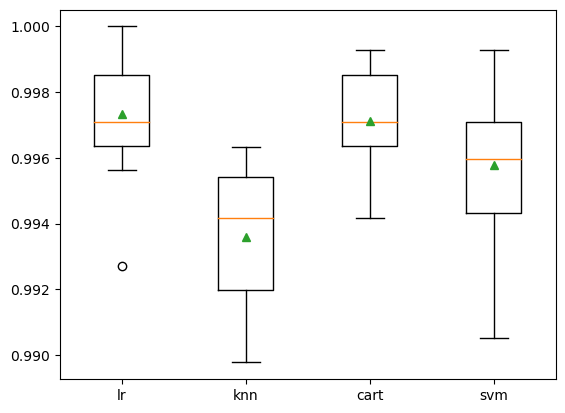

In [11]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()